In [1]:
# Problem Statement
'''
Fake News Classifier using LSTM Recurrent Neural Networks
'''

                                       # WORFLOW
# 1) Data Cleaning (removing null value and splitting to x,y and using regex and stopwords)
# 2) One Hot Encoding of the sentences
# 3) Word Embedding
# 4) LSTM RNN

'\nFake News Classifier using LSTM Recurrent Neural Networks\n'

In [3]:
# importing libs as necessary
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.shape

(20800, 5)

In [7]:
# Data Cleaning and PreProcessing

# removing null values
df.dropna(inplace=True)
df.shape

(18285, 5)

In [8]:
# splitting dataset
X=df.drop(['id','label'],axis='columns')
Y=df['label']

In [9]:
#resetting the index
X.reset_index(inplace=True)

In [13]:
# using regex and stopwords
# !pip install nltk
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(X)):
    review=re.sub('[^a-zA-Z]',' ',X['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [15]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [16]:
# one hot encoding for the words
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000
oh_representation=[one_hot(words,vocab_size) for words in corpus]
oh_representation

[[3309, 6027, 4787, 2636, 1888, 9175, 6144, 7726, 5115, 1243],
 [9265, 1753, 7350, 7344, 2060, 7690, 3821],
 [1620, 1210, 3921, 9113],
 [4222, 5018, 9908, 8105, 2977, 6237],
 [2995, 2060, 6106, 2918, 5345, 493, 2060, 5140, 1401, 988],
 [1736,
  8649,
  5679,
  2180,
  4332,
  782,
  920,
  5555,
  1587,
  1067,
  9812,
  222,
  9273,
  6339,
  3821],
 [9355, 2600, 7203, 5477, 7431, 186, 1736, 8782, 5485, 2736, 4724],
 [9365, 9841, 1736, 9428, 6402, 9445, 782, 8507, 5485, 2736, 4724],
 [7120, 986, 2856, 9163, 4951, 1493, 4592, 1184, 782, 4504],
 [8581, 7976, 8794, 2912, 3459, 3673, 1665, 7203],
 [4938, 6400, 1397, 5881, 9058, 5350, 4381, 7149, 8305, 885, 8751],
 [8105, 1846, 1888, 1493, 782, 6402],
 [7507, 3256, 3836, 7713, 603, 7360, 9165, 1783, 5161],
 [5110, 5637, 2083, 5233, 2016, 9074, 6964, 5485, 2736, 4724],
 [9812, 9625, 8222, 7220, 4388, 5485, 2736, 4724],
 [1431, 4000, 1309, 7043, 6305, 7923, 5913, 4115, 23, 433],
 [1436, 5686, 1753],
 [5567, 885, 533, 203, 782, 9032, 619, 382

In [17]:
# Padding in sequence for word Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_length=20
embedded_docs=pad_sequences(oh_representation,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ... 7726 5115 1243]
 [   0    0    0 ... 2060 7690 3821]
 [   0    0    0 ... 1210 3921 9113]
 ...
 [   0    0    0 ... 5485 2736 4724]
 [   0    0    0 ... 1289 3422   15]
 [   0    0    0 ...  149 1066 8051]]


In [20]:
# Creating a model and performing word embedding
from tensorflow.keras.layers import Embedding, LSTM, Dense
feature_size=40
model=keras.models.Sequential()
model.add(Embedding(vocab_size,feature_size,input_length=sentence_length))
model.add(LSTM(100))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# converting embedded docs into numpy arrays to train our model
X_final=np.array(embedded_docs)
Y_final=np.array(Y)

In [23]:
# spliiting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,test_size=0.2)

In [24]:
# Training our model
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
458/458 [==============================] - 12s 13ms/step - loss: 0.2578 - accuracy: 0.8849
Epoch 2/50
458/458 [==============================] - 5s 10ms/step - loss: 0.1188 - accuracy: 0.9541
Epoch 3/50
458/458 [==============================] - 4s 10ms/step - loss: 0.0743 - accuracy: 0.9743
Epoch 4/50
458/458 [==============================] - 4s 9ms/step - loss: 0.0401 - accuracy: 0.9867
Epoch 5/50
458/458 [==============================] - 3s 7ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 6/50
458/458 [==============================] - 3s 7ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 7/50
458/458 [==============================] - 3s 7ms/step - loss: 0.0103 - accuracy: 0.9969
Epoch 8/50
458/458 [==============================] - 4s 8ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 9/50
458/458 [==============================] - 4s 8ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 10/50
458/458 [==============================] - 3s 7ms/step - loss: 0.0052 - accuracy: 0.

In [25]:
model.evaluate(X_test,Y_test)

115/115 [==============================] - 1s 5ms/step - loss: 1.2123 - accuracy: 0.9210


[1.2122631072998047, 0.9209734797477722]

115/115 [==============================] - 0s 3ms/step


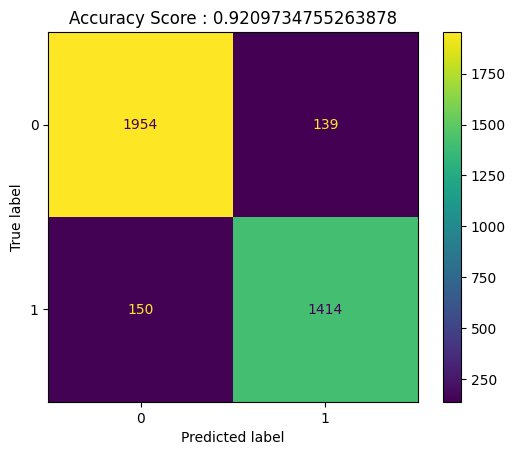

In [32]:
# Performance Metrics and Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
predictions=model.predict(X_test)
predictions=np.round(predictions)
predictions
cm=confusion_matrix(Y_test,predictions)
accuracy_score=accuracy_score(Y_test,predictions)
cm_d=ConfusionMatrixDisplay(cm)
cm_d.plot()
plt.title(f'Accuracy Score : {accuracy_score}')
plt.show()

In [35]:
# Trying Adding Dropout
model=keras.models.Sequential()
model.add(Embedding(vocab_size,feature_size,input_length=sentence_length))
model.add(keras.layers.Dropout(0.3))
model.add(LSTM(100))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(X_train,Y_train,epochs=50)
predictions=model.predict(X_test)
predictions=np.round(predictions)

Epoch 1/50
458/458 [==============================] - 8s 13ms/step - loss: 0.2600 - accuracy: 0.8830
Epoch 2/50
458/458 [==============================] - 5s 12ms/step - loss: 0.1294 - accuracy: 0.9495
Epoch 3/50
458/458 [==============================] - 6s 13ms/step - loss: 0.0838 - accuracy: 0.9699
Epoch 4/50
458/458 [==============================] - 5s 11ms/step - loss: 0.0516 - accuracy: 0.9824
Epoch 5/50
458/458 [==============================] - 5s 10ms/step - loss: 0.0364 - accuracy: 0.9891
Epoch 6/50
458/458 [==============================] - 5s 10ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 7/50
458/458 [==============================] - 5s 10ms/step - loss: 0.0183 - accuracy: 0.9943
Epoch 8/50
458/458 [==============================] - 5s 11ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 9/50
458/458 [==============================] - 5s 11ms/step - loss: 0.0108 - accuracy: 0.9967
Epoch 10/50
458/458 [==============================] - 5s 11ms/step - loss: 0.0105 - accura

TypeError: 'numpy.float64' object is not callable

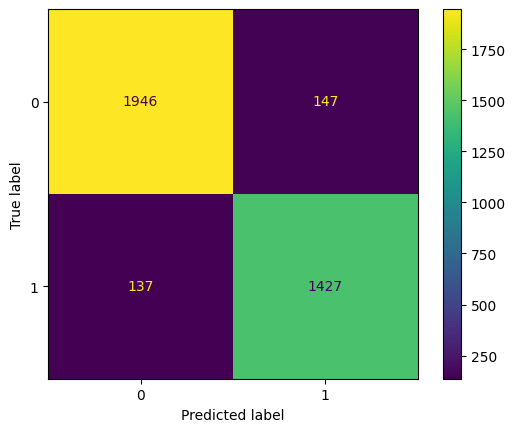

In [44]:
# predictions=int(predictions)
cm=confusion_matrix(Y_test,predictions)
# accuracy_score=accuracy_score(Y_test,predictions)
cm_d=ConfusionMatrixDisplay(cm)
cm_d.plot()
# plt.title(f'Accuracy Score : {accuracy_score}')
plt.show()